In [1]:
%matplotlib inline
from collections import OrderedDict, Counter, defaultdict
import glob 
import itertools
from itertools import izip
import os

from IPython.core.display import HTML
import gffutils
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from clipper.src import CLIP_analysis
from gscripts.general import dataviz
from gscripts import GO
from gscripts.general import region_helpers
import subprocess
import matplotlib.pyplot as plt
fig_dir = "."
img_dir = "."

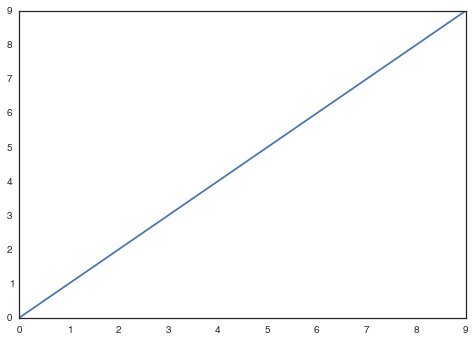

In [5]:
plt.plot(range(10), range(10))

In [3]:
from clipper.src import CLIP_analysis_display

/nas3/gpratt/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
regions = OrderedDict()
regions['all'] = 'All'
regions["cds"] = "CDS"
regions["three_prime_utrs"] = "3' UTR"
regions["five_prime_utrs"] = "5' UTR"
regions["proxintron500"] = "Proximal\nIntron"
regions["distintron500"] = "Distal\nIntron"

assigned_regions = regions.copy()
del assigned_regions['all'] 
def move_name(interval):
    interval.name = interval[12]
    return interval

viz = CLIP_analysis_display.ClipVisualization()

def plot_denovo_motifs(bedtool, fig=None):
    root = "/nas3/gpratt/iPython_Notebook/taf15/"
    out_dir = os.path.join(root, "assigned/")
    fasta_dir = os.path.join(root, "fasta/")
    cluster_name = os.path.basename(bedtool.fn)
    cluster_out = os.path.join(root, bedtool.fn + "_homer")
                               
    cluster_regions = CLIP_analysis.assign_to_regions(tool=bedtool, 
                                                      clusters=cluster_name, 
                                                      regions=assigned_regions, 
                                                      assigned_dir = out_dir,
                                                      species="mm9"
                                                      )

    CLIP_analysis.make_fasta_files_from_regions(cluster_regions, cluster_name, fasta_dir, "/nas3/yeolab/Genome/ucsc/mm9/chromosomes/all.fa")
    CLIP_analysis.calculate_homer_motifs([5,6,7,8], regions, cluster_name, fasta_dir, cluster_out)

    if fig is None:
        fig = plt.figure(figsize=(20, 20))
        
    full_grid = gridspec.GridSpec(6, 4)
    motif_grid = gridspec.GridSpecFromSubplotSpec(1, 6,
                                                  subplot_spec=full_grid[4:6, :],
                                                  hspace=0,
                                                  wspace=0)

    viz.build_common_motifs(motif_grid, cluster_out)
    
    
gene_id_to_name = region_helpers.gene_id_to_name("/nas3/gpratt/gencode/gencode.vM1.annotation.gtf.db")
gene_id_to_type = region_helpers.gene_id_to_type("/nas3/gpratt/gencode/gencode.vM1.annotation.gtf.db")

In [1]:
!scp tscc-login.sdsc.edu:/home/gpratt/projects/fet_family/analysis/mouse_clip_v5/TAF15_WholeBrain.merged.peaks.kasey.bed /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TAF15_WholeBrain.merged.peaks.kasey.bed
!scp tscc-login.sdsc.edu:/home/gpratt/projects/fet_family/analysis/mouse_clip_v5/TDP43_WholeBrain.merged.peaks.kasey.bed /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TDP43_WholeBrain.merged.peaks.kasey.bed
!scp tscc-login.sdsc.edu:/home/gpratt/projects/fet_family/analysis/mouse_clip_v5/TLS_WholeBrain.merged.peaks.kasey.bed /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TLS_WholeBrain.merged.peaks.kasey.bed


TAF15_WholeBrain.merged.peaks.kasey.bed       100% 1682KB   1.6MB/s   00:00    
TDP43_WholeBrain.merged.peaks.kasey.bed       100% 5215KB   5.1MB/s   00:01    
TLS_WholeBrain.merged.peaks.kasey.bed         100%  219KB 219.0KB/s   00:00    


In [6]:
rbps = {"taf15": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TAF15_WholeBrain.merged.peaks.kasey.bed"),
        'tdp43': pybedtools.BedTool("/nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TDP43_WholeBrain.merged.peaks.kasey.bed"),
        'tls': pybedtools.BedTool("/nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TLS_WholeBrain.merged.peaks.kasey.bed"),}

In [7]:
# rbps = {"taf15": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed"),
#         "tls": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TLS_hiseq_notrim_ingenes_clusters_mm950.bed"),
#         "tdp43": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TDP43brainclip_MP41_kcomb_notrim_ingenes_clusters_mm950.bed"),
#  }

There are a total 68414 clusters I'll examine
For region: cds found 313 that overlap and 68101 that don't
For region: three_prime_utrs found 2783 that overlap and 65318 that don't
For region: five_prime_utrs found 196 that overlap and 65122 that don't
For region: proxintron500 found 9222 that overlap and 55900 that don't
For region: distintron500 found 55824 that overlap and 76 that don't
After assigning 76 un-categorized regions
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TDP43_WholeBrain.merged.peaks.kasey.bed_homer/all
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TDP43_WholeBrain.merged.peaks.kasey.bed_homer/cds
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TDP43_WholeBrain.merged.peaks.kasey.bed_homer/three_prime_utrs
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TDP

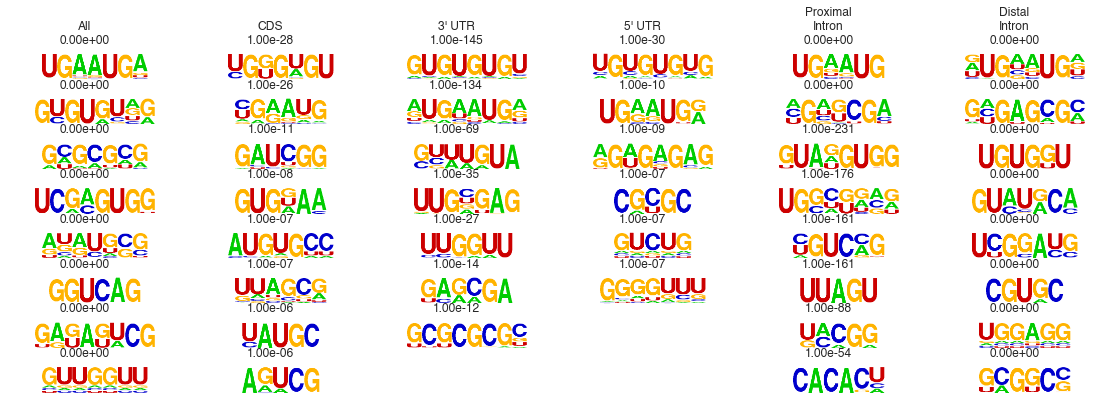

In [8]:
plot_denovo_motifs(rbps['tdp43'])

There are a total 2951 clusters I'll examine
For region: cds found 131 that overlap and 2820 that don't
For region: three_prime_utrs found 615 that overlap and 2205 that don't
For region: five_prime_utrs found 17 that overlap and 2188 that don't
For region: proxintron500 found 484 that overlap and 1704 that don't
For region: distintron500 found 1685 that overlap and 19 that don't
After assigning 19 un-categorized regions
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TLS_WholeBrain.merged.peaks.kasey.bed_homer/all
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TLS_WholeBrain.merged.peaks.kasey.bed_homer/cds
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TLS_WholeBrain.merged.peaks.kasey.bed_homer/three_prime_utrs
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TLS_WholeBrain.mer

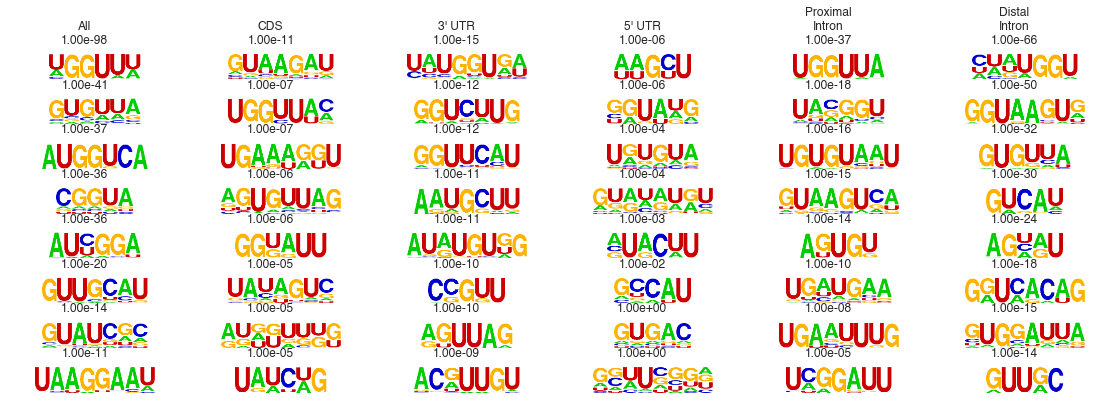

In [9]:
plot_denovo_motifs(rbps['tls'])

There are a total 22412 clusters I'll examine
For region: cds found 2277 that overlap and 20135 that don't
For region: three_prime_utrs found 5618 that overlap and 14517 that don't
For region: five_prime_utrs found 170 that overlap and 14347 that don't
For region: proxintron500 found 2577 that overlap and 11770 that don't
For region: distintron500 found 11687 that overlap and 83 that don't
After assigning 83 un-categorized regions
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TAF15_WholeBrain.merged.peaks.kasey.bed_homer/all
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TAF15_WholeBrain.merged.peaks.kasey.bed_homer/cds
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TAF15_WholeBrain.merged.peaks.kasey.bed_homer/three_prime_utrs
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TA

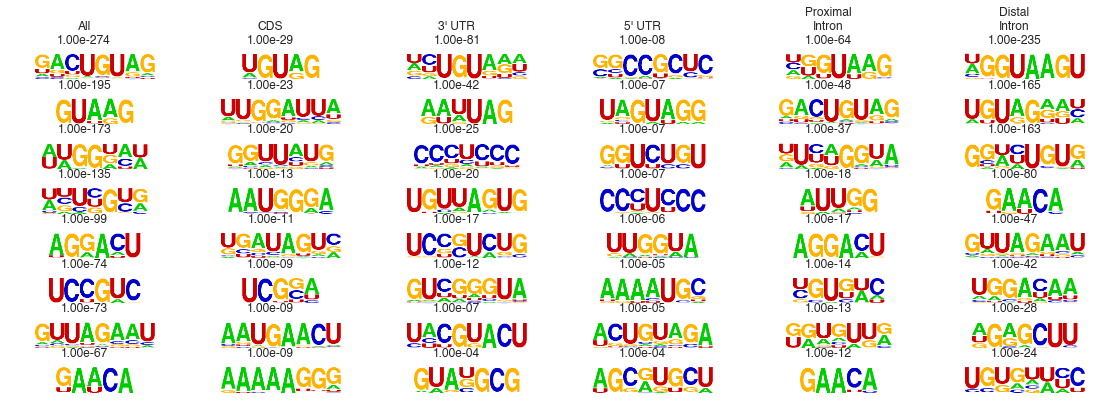

In [10]:
plot_denovo_motifs(rbps['taf15'])

In [11]:
def run_homer(foreground, background, k=list([5,6,7,8,9]), outloc=os.getcwd()):
    
    """
    
    runs homer with standard args
    output location is saved
    
    foreground - str, location of fasta file for the foreground distribution
    background - str, location of fasta file for the background distribution
    k - different k-mers to examine
    outloc - directory to output homer results 

    --make optional make work off locations and not fasta files 
    
    """
    #findMotifs.pl clusters.fa fasta outloc -nofacts p 4 -rna -S 10 -len 5,6,7,8,9 -noconvert -nogo -fasta background.fa
    #converts k to a string for use in subprocess
    k = ",".join([str(x) for x in k])
    print "starting Homer"
    
    try:
        with open(os.devnull, 'w') as fnull:
            print "findMotifs.pl", foreground, "fasta", outloc, "-nofacts", "-p", "4", "-rna", "-S", "20", "-len", k, "-noconvert", "-nogo", "-fasta", background, "-chopify"
            result = subprocess.call(["findMotifs.pl", foreground, "fasta", 
                                  outloc, "-nofacts", "-p", "4", "-rna", "-S", "20",
                                   "-len", k, "-noconvert", "-nogo", "-fasta", background, "-chopify"], shell=False, stdout=fnull)
            
        print "Homer Finished, output here: %s" % outloc
    except OSError:
        print "Homer not installed, ignoring motif generation, install homer for this to work"  
        raise

#Transcriptome Background Homer (this takes a long, long time)

In [26]:
print "foo"

foo


In [30]:
assigned_regions, all_regions = CLIP_analysis.regions_generator()

def move_name(interval):
    interval.name = interval[12]
    return interval

viz = CLIP_analysis_display.ClipVisualization()

def calculate_homer_motifs(kmer_list, regions, clusters, fasta_dir, homerout):
    
    """
    
    Calculates motiffs for homer
    
    kmer_list - list[int] different kmers to examine
    regions   - list[str] regions to compute kmers on
    clusters - str name out output file
    fasta_dir - str directoy of fasta files
    homerout - str output dir of homer
    
    """
    if kmer_list is None:
        return None
    
    for region in regions:
        #reads nicely named files
        real_fa = CLIP_analysis.fa_file(clusters, region=region, directory=fasta_dir, type="real")
        if region == "all":
            region = "genes"
        rand_fa = os.path.join("/nas3/gpratt/clipper/clipper/data/regions", "mm9_" + region + ".fasta")
        #rand_fa = CLIP_analysis.fa_file(clusters, region=region, directory=fasta_dir, type="random")

        region_homer_out = os.path.join(homerout, region)
        run_homer(real_fa, rand_fa, kmer_list, outloc=region_homer_out)
        
def plot_denovo_motifs(bedtool, fig=None):
    root = "/nas3/gpratt/iPython_Notebook/taf15/"
    out_dir = os.path.join(root, "assigned/")
    fasta_dir = os.path.join(root, "fasta/")
    cluster_name = os.path.basename(bedtool.fn)
    cluster_out = os.path.join(root, bedtool.fn + "_homer_transcriptome")
                               
    cluster_regions = CLIP_analysis.assign_to_regions(tool=bedtool, 
                                                      clusters=cluster_name, 
                                                      regions=assigned_regions, 
                                                      assigned_dir = out_dir,
                                                      species="mm9"
                                                      )

    CLIP_analysis.make_fasta_files_from_regions(cluster_regions, cluster_name, fasta_dir, "/nas3/yeolab/Genome/ucsc/mm9/chromosomes/all.fa")
    calculate_homer_motifs([7,8], regions, cluster_name, fasta_dir, cluster_out)

    if fig is None:
        fig = plt.figure(figsize=(20, 20))
        
    full_grid = gridspec.GridSpec(6, 4)
    motif_grid = gridspec.GridSpecFromSubplotSpec(1, 6,
                                                  subplot_spec=full_grid[4:6, :],
                                                  hspace=0,
                                                  wspace=0)

    viz.build_common_motifs(motif_grid, cluster_out)

In [31]:
print "foo"

foo


In [ ]:
#this won't finish before I turn off the computer, but at least the results will be there
plot_denovo_motifs(rbps['taf15'])
fig = plt.gcf()
fig.savefig("/nas3/gpratt/Dropbox/TAF15/Data/clip/motifs/taf15_clip.svg")

There are a total 22412 clusters I'll examine
For region: cds found 2277 that overlap and 20135 that don't
For region: three_prime_utrs found 5618 that overlap and 14517 that don't

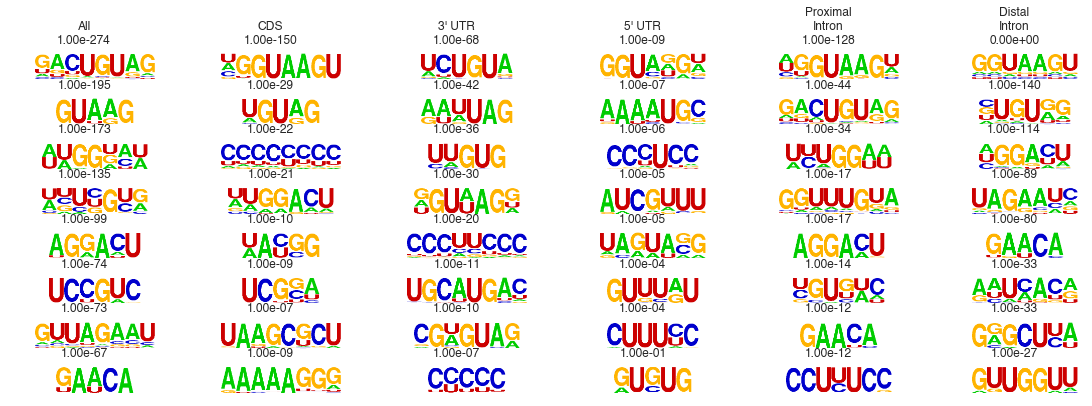

In [29]:
#this won't finish before I turn off the computer, but at least the results will be there
plot_denovo_motifs(rbps['taf15'])
fig = plt.gcf()
fig.savefig("/nas3/gpratt/Dropbox/TAF15/Data/clip/motifs/taf15_clip.svg")

Figure Legend: TAF15 Motifs using whole sub-transcriptomic region as background